In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf

# Read Data
Data is got from [data.mendeley.com](https://data.mendeley.com/datasets/pk6tzrjks8/1)

In [2]:
df = pd.read_csv('Air-Quality-Ho-Chi-Minh-City.csv')
df.date = pd.to_datetime(df.date, dayfirst=True, format='%d-%m-%Y %H:%M')
df.Station_No = df.Station_No.astype('str')
df

,date,Station_No,TSP,PM2.5,O3,CO,NO2,SO2,Temperature,Humidity
0,2021-02-23 21:00:00,1,32.935714,15.604762,55.431381,1330.451429,112.740762,393.000000,28.361905,63.188095
1,2021-02-23 22:00:00,1,30.932353,14.594118,58.197176,1200.603529,112.366471,377.588235,28.320588,63.773529
2,2021-02-23 23:00:00,1,27.645000,13.436667,55.029433,1177.897000,112.700433,372.476667,28.336667,64.205000
3,2021-02-24 00:00:00,1,24.380000,12.365000,54.767700,1267.476000,112.480867,389.070000,28.305000,64.735000
4,2021-02-24 01:00:00,1,22.521667,11.636667,53.786200,1322.293000,114.331500,393.000000,28.300000,65.188333
...,...,...,...,...,...,...,...,...,...,...
52543,2022-06-21 13:00:00,6,21.526667,10.201667,100.080283,1007.907000,73.962600,146.720000,33.496667,60.470000
52544,2022-06-21 14:00:00,6,26.590000,11.250000,119.612133,1262.319000,96.609333,181.216667,33.026667,62.556667
52545,2022-06-21 15:00:00,6,27.606667,11.355000,119.448550,1457.330000,100.310600,212.220000,33.106667,62.175000
52546,2022-06-21 16:00:00,6,37.433333,15.048333,125.730150,2125.257000,128.383767,350.643333,31.406667,70.605000


In [3]:
df[['Station_No']].groupby(['Station_No']).value_counts()

Station_No
1    7892
2    9357
3    8418
4    9951
5    7431
6    9499
dtype: int64

In [4]:
# df[df['TSP'] < df['PM2.5']]

Phân tích theo trạm (Optional)

In [5]:
station = 2 # chọn trạm 1-6
df = df[df['Station_No'] == str(station)]
df

,date,Station_No,TSP,PM2.5,O3,CO,NO2,SO2,Temperature,Humidity
7892,2021-02-23 21:00:00,2,27.693182,13.961364,74.460159,1238.461364,58.384773,367.395455,28.100000,64.729545
7893,2021-02-23 22:00:00,2,25.988235,13.147059,76.095118,1126.113529,58.342000,366.800000,28.052941,65.394118
7894,2021-02-23 23:00:00,2,23.338333,12.230000,75.150183,1100.733000,58.687033,366.800000,28.060000,65.851667
7895,2021-02-24 00:00:00,2,20.748333,11.258333,72.303833,1138.169000,58.153800,366.363333,28.031667,66.386667
7896,2021-02-24 01:00:00,2,19.321667,10.701667,70.079100,1166.055000,58.718400,367.236667,28.000000,66.838333
...,...,...,...,...,...,...,...,...,...,...
17244,2022-06-21 13:00:00,2,33.548333,9.635000,97.070350,NaN,30.049267,169.863333,35.235000,57.315000
17245,2022-06-21 14:00:00,2,34.205000,10.228333,136.919250,NaN,57.338267,173.793333,33.980000,60.023333
17246,2022-06-21 15:00:00,2,34.475000,10.441667,136.886533,NaN,56.710933,161.566667,33.371667,61.831667
17247,2022-06-21 16:00:00,2,37.670000,13.625000,163.419750,NaN,81.521967,171.173333,30.561667,70.615000


# Thống kê mô tả

In [6]:
pd.Series(df.isnull().mean() * 100, name='missing_rate')

date            0.000000
Station_No      0.000000
TSP             0.000000
PM2.5           0.000000
O3              0.000000
CO             96.173987
NO2             0.000000
SO2             0.096185
Temperature     0.000000
Humidity        0.000000
Name: missing_rate, dtype: float64

In [7]:
df.describe()

,TSP,PM2.5,O3,CO,NO2,SO2,Temperature,Humidity
count,9357.000000,9357.000000,9357.000000,358.000000,9357.000000,9348.000000,9357.000000,9357.000000
mean,45.299871,19.175059,113.059813,1050.801502,62.582263,213.764895,29.259791,75.088283
std,14.300370,10.642143,38.121401,968.363205,26.674533,87.576789,2.898062,12.547332
min,17.771667,4.758333,0.000000,0.000000,0.000000,62.006667,21.128333,36.101667
25%,36.073333,12.281667,90.592450,714.578750,44.321100,153.270000,27.020000,65.166667
50%,41.240000,16.091379,109.600833,817.480000,68.379333,190.386667,28.631034,76.723333
75%,49.773333,22.250000,131.193833,1272.442000,81.929733,253.266667,31.433333,85.741667
max,146.568333,95.970000,372.139500,10809.263000,155.421833,683.820000,38.616667,97.595000


In [8]:
df.describe(exclude=[np.number])

C:\Users\ACER\AppData\Local\Temp\ipykernel_14732\2684435253.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude=[np.number])


,date,Station_No
count,9357,9357
unique,9357,1
top,2021-02-23 21:00:00,2
freq,1,9357
first,2021-02-23 21:00:00,NaN
last,2022-06-21 17:00:00,NaN


In [9]:
df_max = pd.DataFrame([], columns=['date','Station_No','Max Value', 'Attribute'])
for col in df.columns[2:]:
    t = df.loc[df[col][df[col] == df[col].max()].index[0]][['date','Station_No',col]].values.tolist() + [col]
    df_max.loc[len(df_max.index)] = t
df_max

,date,Station_No,Max Value,Attribute
0,2022-01-21 06:00:00,2,146.568333,TSP
1,2022-01-21 06:00:00,2,95.970000,PM2.5
2,2021-05-14 18:00:00,2,372.139500,O3
3,2021-03-10 09:00:00,2,10809.263000,CO
4,2022-03-29 17:00:00,2,155.421833,NO2
5,2021-05-21 20:00:00,2,683.820000,SO2
6,2022-06-09 14:00:00,2,38.616667,Temperature
7,2021-10-23 19:00:00,2,97.595000,Humidity


In [10]:
df_min = pd.DataFrame([], columns=['date','Station_No','Min Value', 'Attribute'])
for col in df.columns[2:]:
    t = df.loc[df[col][df[col] == df[col].min()].index[0]][['date','Station_No',col]].values.tolist() + [col]
    df_min.loc[len(df_min.index)] = t
df_min

,date,Station_No,Min Value,Attribute
0,2021-03-01 06:00:00,2,17.771667,TSP
1,2022-04-29 12:00:00,2,4.758333,PM2.5
2,2021-04-03 01:00:00,2,0.000000,O3
3,2021-03-10 11:00:00,2,0.000000,CO
4,2021-04-02 12:00:00,2,0.000000,NO2
5,2021-12-11 23:00:00,2,62.006667,SO2
6,2021-12-05 05:00:00,2,21.128333,Temperature
7,2021-04-07 13:00:00,2,36.101667,Humidity


In [11]:
df_numeric = df.drop(['date', 'Station_No'], axis=1)

In [12]:
def plot_hist(plt, df, attribute):
    plt.hist(df[attribute], edgecolor = "black")
    plt.title(f'Distribution of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Requency')
    plt.grid(axis='y')
    
    return plt

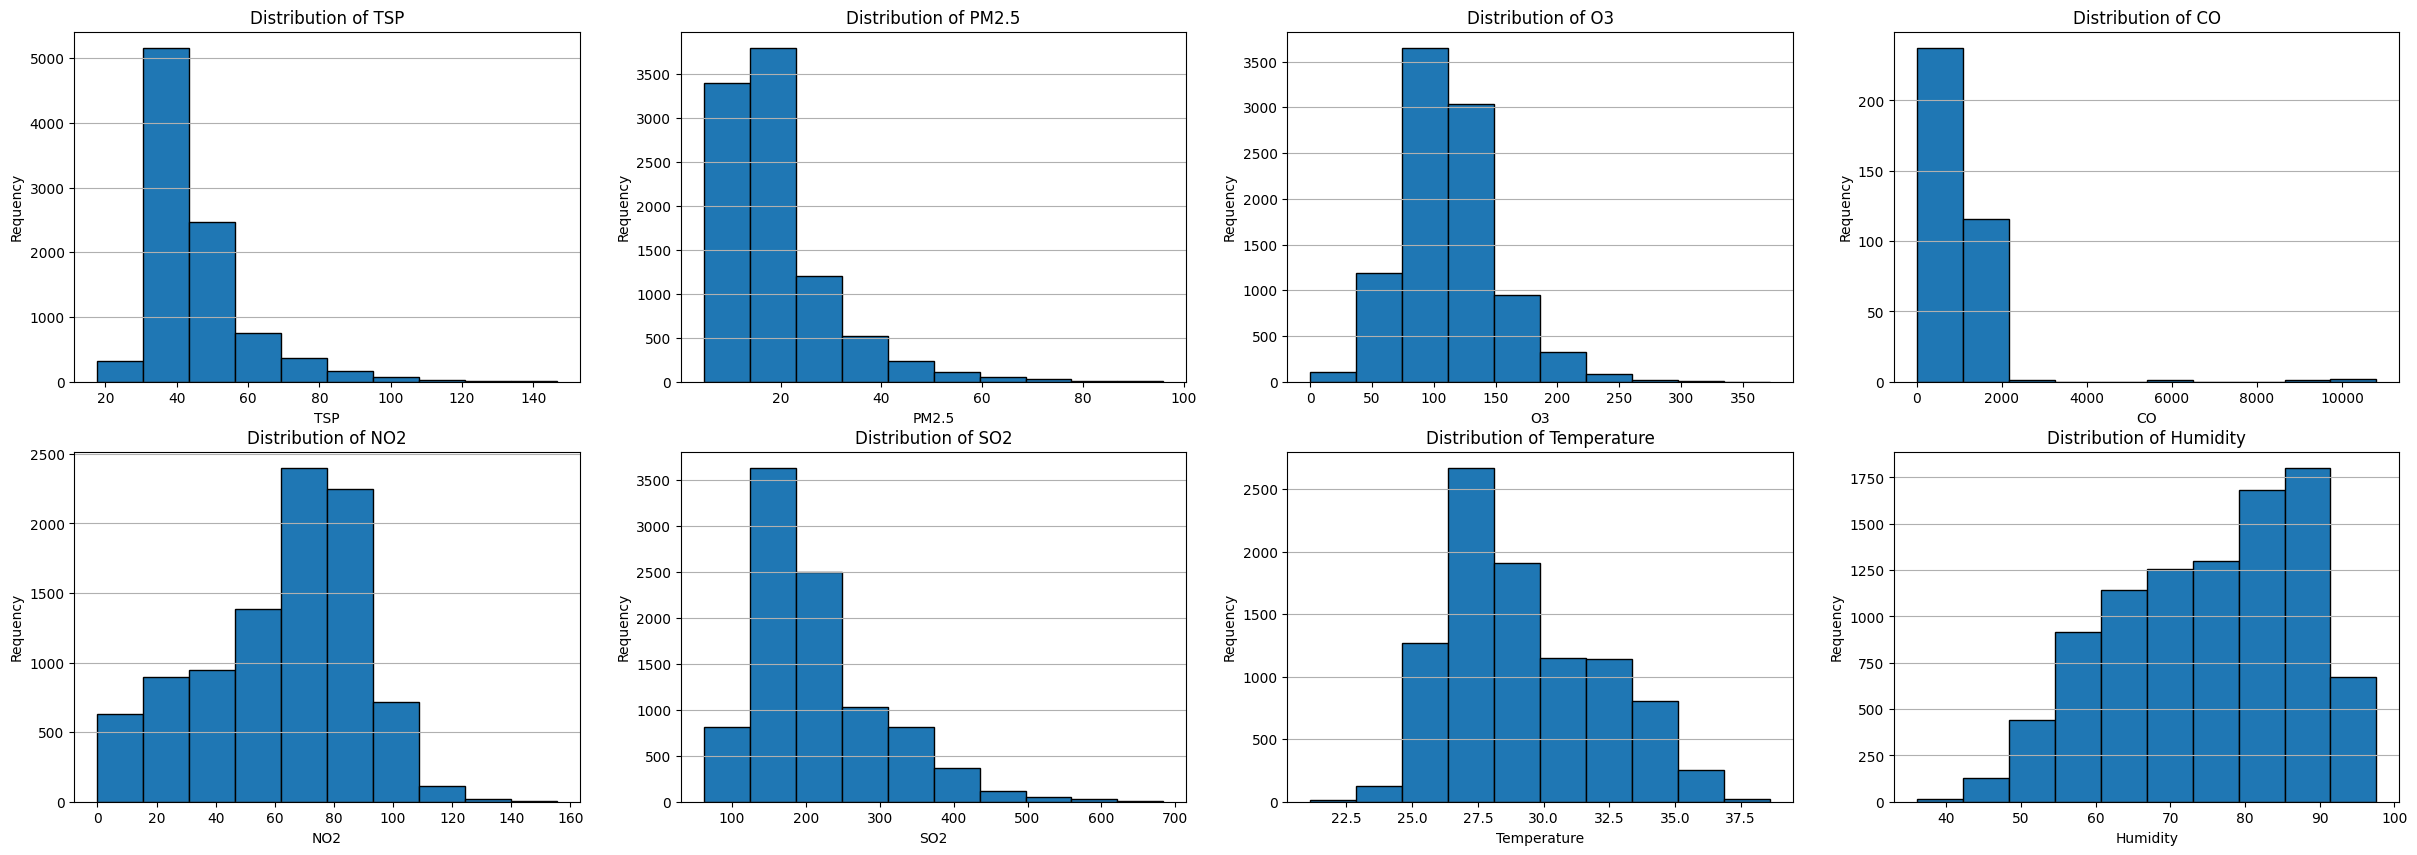

In [13]:
plt.figure(figsize=(30,10))
plt.tight_layout()

for i in range(len(df_numeric.columns)):
    plt.subplot(2,4,i+1)
    plot_hist(plt, df, df_numeric.columns[i])

plt.show()

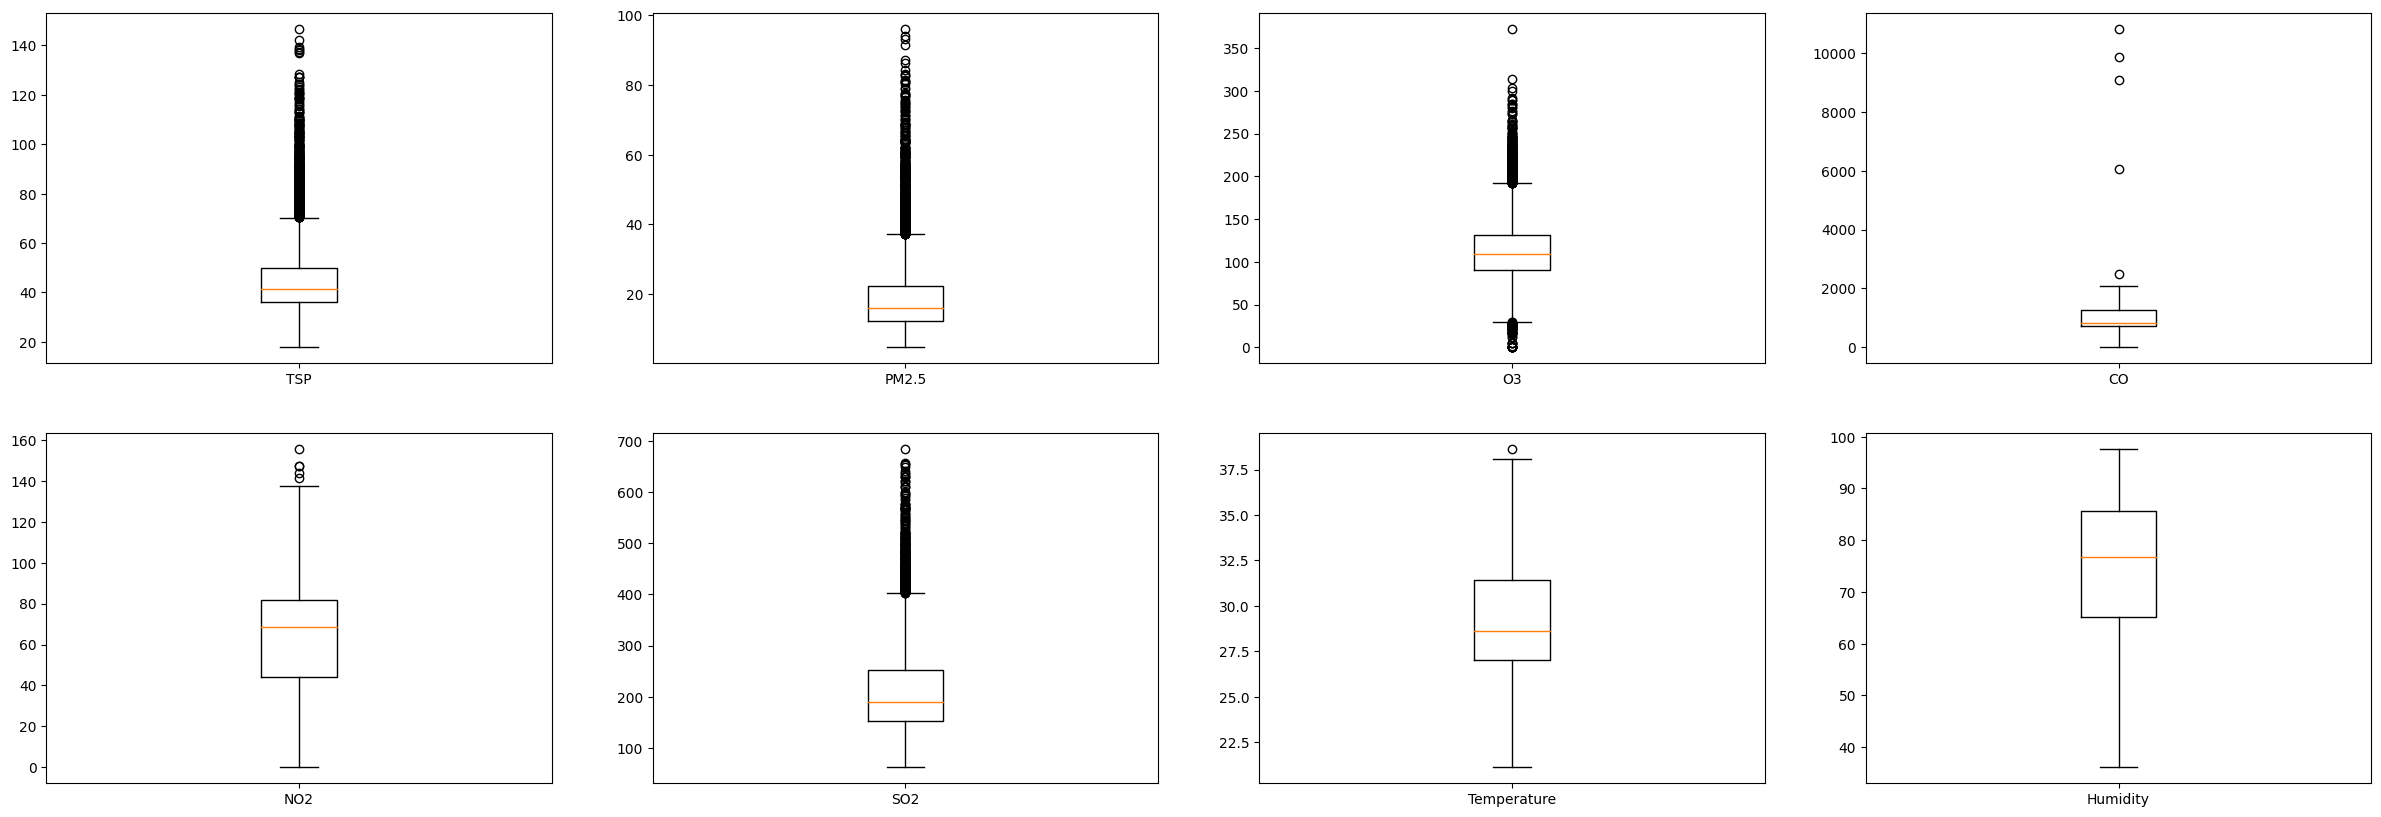

In [14]:
plt.figure(figsize=(30,10))
plt.tight_layout()

for i, col in enumerate(df_numeric.columns):
    plt.subplot(2,4,i+1)
    plt.boxplot(df[col].dropna(), labels=[col])

plt.show()

# Phân tích dữ liệu đơn giản

C:\Users\ACER\AppData\Local\Temp\ipykernel_14732\3173252875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

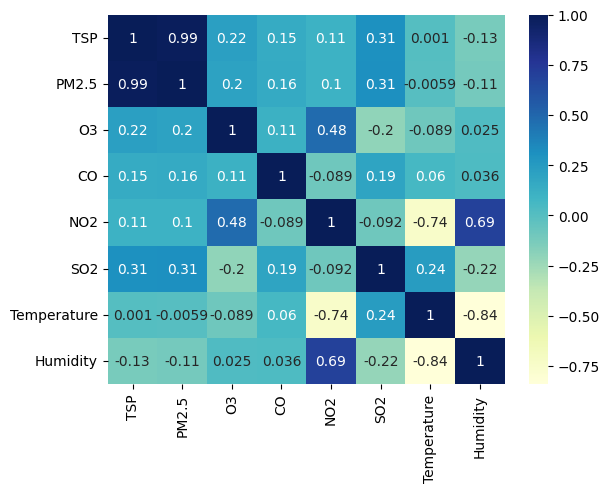

In [15]:
corr = df.corr()
# print(corr)
sb.heatmap(corr, cmap="YlGnBu", annot=True)

In [16]:
def plot_scatter(plt, df, attr_1, attr_2):
    value = df[attr_1].corr(df[attr_2])
    print(f'The correlation coefficient between {attr_1} and {attr_2}: {value}')

    plt.scatter(df[attr_1], df[attr_2] + np.random.random(len(df[attr_2])))
    plt.title(f'Scatter plot of {attr_1} and {attr_2}')
    plt.xlabel(attr_1)
    plt.ylabel(attr_2)
    return plt

The correlation coefficient between TSP and PM2.5: 0.9852455137497144
The correlation coefficient between CO and SO2: 0.18825406097691114


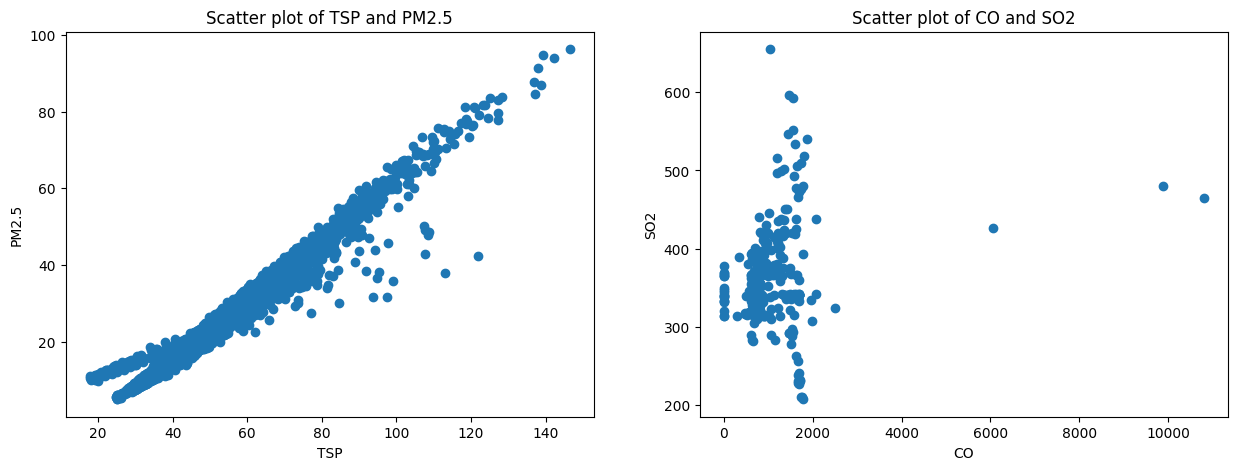

In [17]:
plt.figure(figsize=(15,5))
plt.tight_layout()

plt.subplot(1,2,1)
plot_scatter(plt, df, 'TSP', 'PM2.5')

plt.subplot(1,2,2)
plot_scatter(plt, df, 'CO', 'SO2')

plt.show()

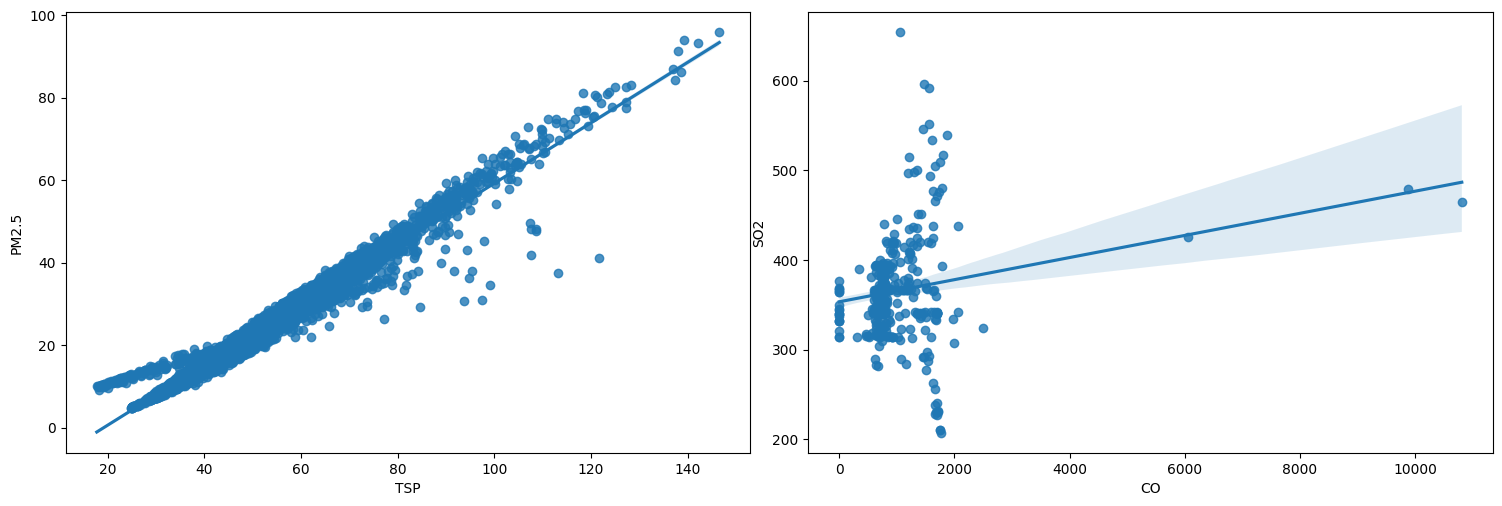

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.tight_layout()

sb.regplot(data=df, x='TSP', y='PM2.5', y_jitter=.03, ax=axes[0])
sb.regplot(data=df, x='CO', y='SO2', y_jitter=.03, ax=axes[1])

plt.show()

# Phân tích hồi quy, giải thích

In [19]:
results = smf.ols('Q("Temperature") ~ Q("TSP") + Q("PM2.5") + Q("O3") + Q("CO") + Q("NO2") + Q("SO2")', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Q("Temperature")   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     104.7
Date:                Sun, 21 May 2023   Prob (F-statistic):           7.04e-75
Time:                        10:20:13   Log-Likelihood:                -481.15
No. Observations:                 355   AIC:                             976.3
Df Residuals:                     348   BIC:                             1003.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.8765      0.535     50.217      0.0

In [20]:
results = smf.ols('Q("PM2.5") ~ Q("TSP")', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Q("PM2.5")   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 3.100e+05
Date:                Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                        10:20:13   Log-Likelihood:                -18887.
No. Observations:                9357   AIC:                         3.778e+04
Df Residuals:                    9355   BIC:                         3.779e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.0391      0.063   -224.433      0.0

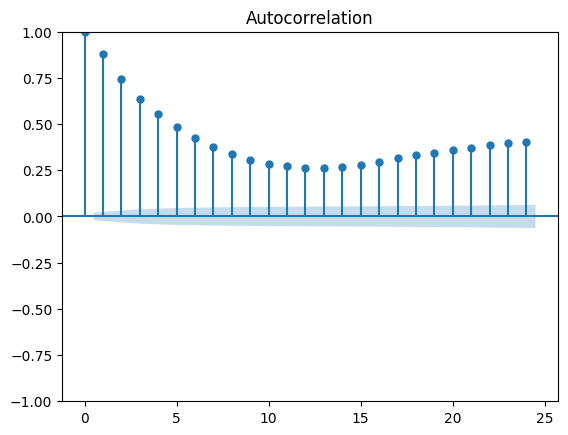

In [21]:
plot_acf(df_numeric['PM2.5'], lags=24)
plt.show()

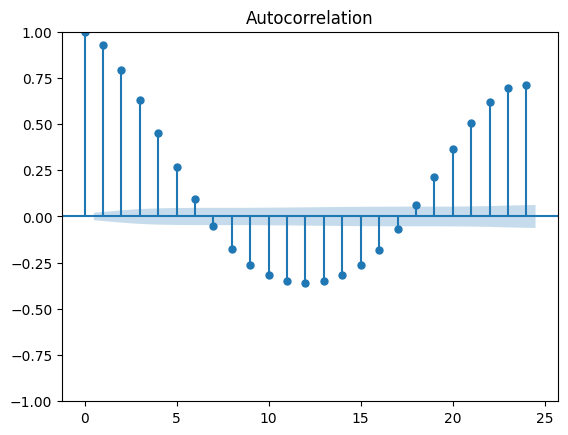

In [22]:
plot_acf(df_numeric['Temperature'], lags=24)
plt.show()